In [1]:
import numpy as np # linear algebra
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Packages for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
##luded in your notebook, next to the code.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing packages for Predictions
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree

Data Loading & basic analysis

In [3]:
byb=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match= pd.read_csv('IPL Matches 2008-2020.csv')

In [4]:
byb

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [5]:
match

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [6]:
print(byb.columns)
print(match.columns)

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')
Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')


In [7]:
byb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
# Checking match win total null values
match['winner'].isnull().sum()

4

In [10]:
# Checking null match values
# So we could simply removes these columns

match[match['winner'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [11]:
match[match['result']=='tie']
# So far 13 match are tie and we can see eliminator column is having Y  

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [12]:
match.method.unique()

array([nan, 'D/L'], dtype=object)

In [13]:
# Check the no match each team won
match['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [14]:
match['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [15]:
match['team2'].value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team2, dtype: int64

Exploratory Data Analysis (EDA)

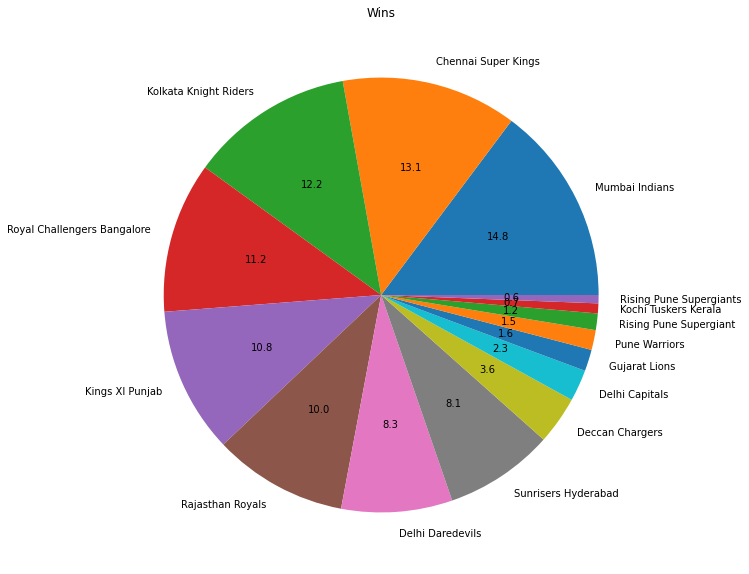

In [16]:
# Most wins in IPL
temp = pd.DataFrame({'Winner': match['winner']})
count_win = temp.value_counts()
# Count_wins is a dictionary; with key being Mumbai Indian and all

# creating label : containing team's name

labels= [I[0] for I in count_win.keys()]


#count_win.bar()
'''plt.bar(count_win)
plt.show()'''

bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=count_win, autopct="%.1f", labels= labels)
plt.title("Wins")
plt.show()


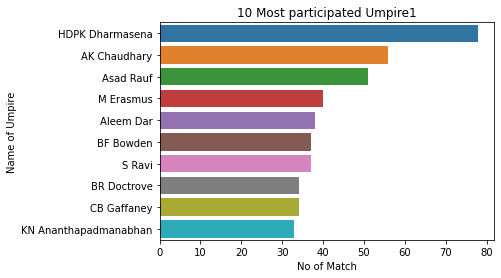

In [17]:
# Top 10 Umpire1 & 2 value count

sns.barplot(x=match['umpire1'].value_counts().head(10).values,
            y=match['umpire1'].value_counts().head(10).index,
            data= match
           )
plt.xlabel("No of Match")
plt.ylabel("Name of Umpire")
plt.title('10 Most participated Umpire1')
plt.show()

In [18]:

match['Season']= pd.DatetimeIndex(match['date']).year
match.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


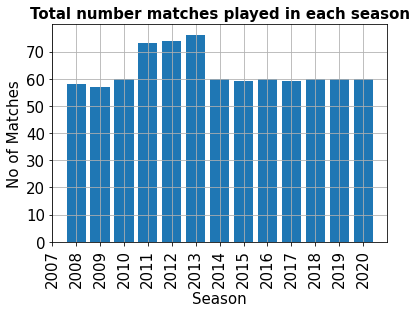

"ax2 = fig.add_subplot(122)\nfont_size=14\nbbox=[0, 0, 1, 1]\nax2.axis('off')\nmpl_table = ax2.table(cellText = mps.values, rowLabels = mps.index, bbox=bbox, colLabels=mps.columns)\nmpl_table.auto_set_font_size(False)\nmpl_table.set_fontsize(font_size)\n"

In [19]:
match_per_season = match.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})

# {'id':'matches'}: Dictionary to convert id columns to matches
# match_per_season
x= match_per_season.Season
y=match_per_season.matches
mps=match_per_season

plt.bar(match_per_season.Season, match_per_season.matches)
plt.xticks(rotation=90)
plt.grid(True)
plt.xticks(list(range(1,max(x)+1)),[str(i) for i in range(1,max(x)+1)], fontsize=15) # To plot X axis with 1 interval
plt.yticks(np.arange(0,80,step=10), fontsize=15) # Here again we are setting frequency using array
plt.xlim([2007, 2021]) # to define limit of x
plt.ylim([0, 80])
plt.xlabel("Season", fontsize=15)
plt.ylabel("No of Matches", fontsize=15)
plt.title('Total number matches played in each season', fontsize=15, fontweight = 'bold')
plt.show()

# Rendering dataframe as matplotlib table
'''ax2 = fig.add_subplot(122)
font_size=14
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = mps.values, rowLabels = mps.index, bbox=bbox, colLabels=mps.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
'''

In [20]:
# Mergring season column with byb using lefet joint
season_data= match[['id','Season']].merge(byb,left_on='id',right_on='id',how='left').drop('id', axis=1)
season_data.head(2)

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


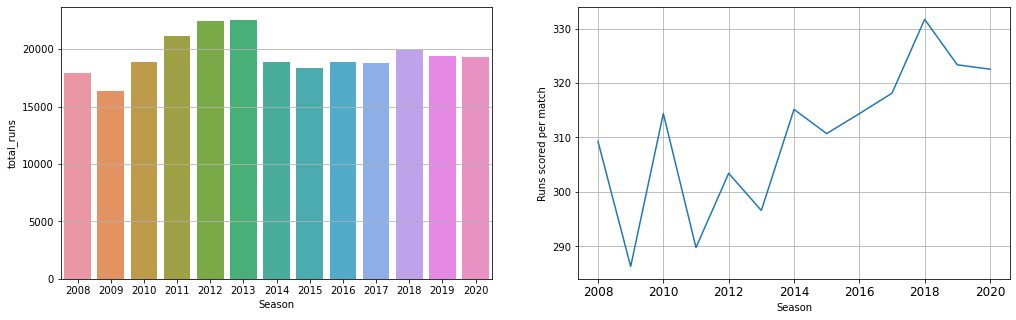

In [21]:
# total Run scored in each season. Total Season Run= sr
# Avg run per Season. average run =ars
# msp= Match per Season

sr = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
ars= pd.concat([mps,sr.iloc[:,1]],axis=1)
ars['Runs scored per match']=ars['total_runs']/ars['matches']
ars.set_index('Season',inplace=True)

# Sub plot in sns

f, axes = plt.subplots(1, 2)
f.set_size_inches(17, 5)
axes[0].grid(True)
axes[1].grid(True)
plt.xticks(fontsize=12)
sns.barplot(x=ars.index,y=ars['total_runs'], data= ars, ax=axes[0]);
sns.lineplot(x=ars.index,y=ars['Runs scored per match'], data= ars, ax=axes[1]);



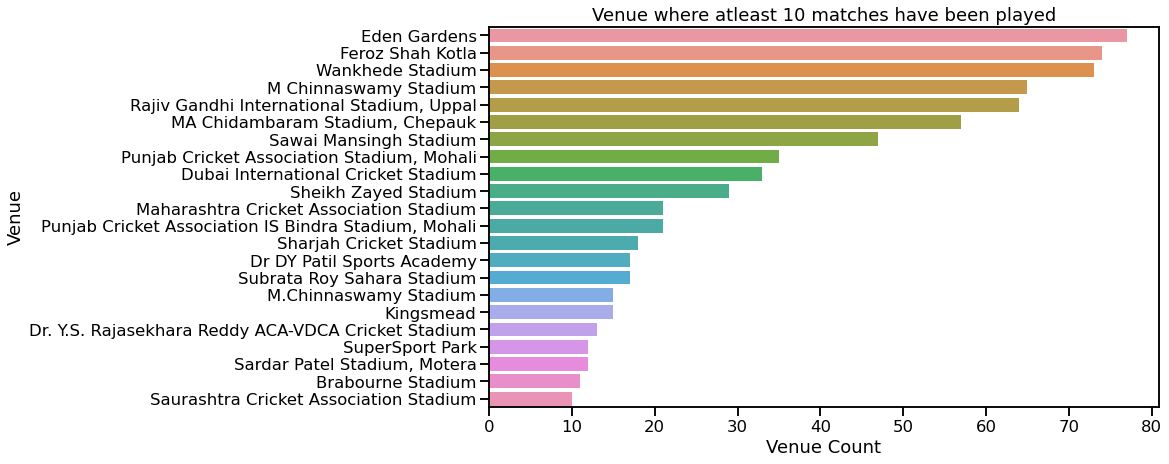

In [22]:
# Venue where atleast 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().head(22).values,
           y= match['venue'].value_counts().head(22).index,
           data=match)

plt.title('Venue where atleast 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

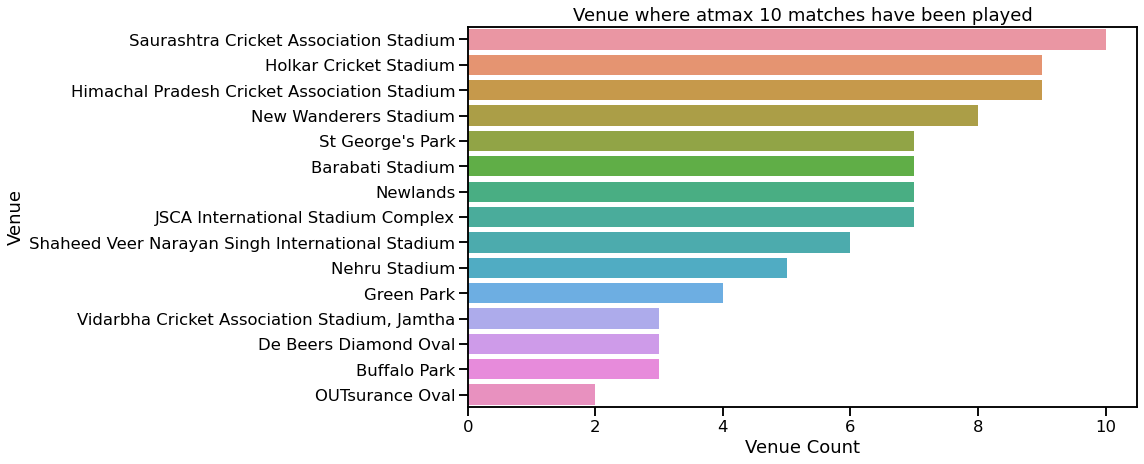

In [23]:
# Venue where atmax 10 matches have been played

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=match['venue'].value_counts().tail(15).values,
           y= match['venue'].value_counts().tail(15).index,
           data=match)

plt.title('Venue where atmax 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

In [24]:
# Which Stadium is best for winning by wickets i.e team fielding won the match
match.venue[match.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [25]:
# Which stadium is best for winning by run i.e bat First
match.venue[match.result=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [26]:
# Which stadium is best for team when they win the toss

# Create a list containing complete team name
t= match['team1'].unique()
for i in t:
    venues= match.venue[match.toss_winner == i][match.winner==i].mode()
    for venue in venues:
        print(venue +' is best for '+ i + ' if they won the toss')
        #print()
    print()


# Diagnosis
'''print(a +' is best for '+ i + ' if they won the toss')
    print()'''
    # print(a.values[0])
  #print(venues.values[0] +' is best for '+ i + ' if they won the toss')
    #print()

M Chinnaswamy Stadium is best for Royal Challengers Bangalore if they won the toss

Punjab Cricket Association Stadium, Mohali is best for Kings XI Punjab if they won the toss

Feroz Shah Kotla is best for Delhi Daredevils if they won the toss

Wankhede Stadium is best for Mumbai Indians if they won the toss

Eden Gardens is best for Kolkata Knight Riders if they won the toss

Sawai Mansingh Stadium is best for Rajasthan Royals if they won the toss

Barabati Stadium is best for Deccan Chargers if they won the toss
Dr DY Patil Sports Academy is best for Deccan Chargers if they won the toss
Feroz Shah Kotla is best for Deccan Chargers if they won the toss
Kingsmead is best for Deccan Chargers if they won the toss
MA Chidambaram Stadium, Chepauk is best for Deccan Chargers if they won the toss
SuperSport Park is best for Deccan Chargers if they won the toss

MA Chidambaram Stadium, Chepauk is best for Chennai Super Kings if they won the toss

Feroz Shah Kotla is best for Kochi Tuskers Ker

"print(a +' is best for '+ i + ' if they won the toss')\n    print()"

In [27]:
# Which is the best chasing team
match.winner[match.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [28]:
# Which Team won the most no of matches batting 1st
match.winner[match.result=='runs'].mode()

0    Mumbai Indians
dtype: object

In [29]:
match['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [30]:
# Toss Decision
teams= match['toss_winner'].unique()
decision_making=pd.DataFrame([],columns =['Toss Winner','Decision', 'Times'])

for id, element in enumerate(teams):
    temp_bat=match[(match['toss_winner']== element) & (match['toss_decision']== 'bat')]
    temp_field= match[(match['toss_winner']== element)& (match['toss_decision']=='field')]
    
    #append to decision making
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'bat', 
                                              'Times' :temp_bat['toss_winner'].count()},ignore_index= True)
    
    # For Feild
    decision_making = decision_making.append({'Toss Winner': element, 'Decision':'field', 
                                              'Times' :temp_field['toss_winner'].count()},ignore_index= True)

In [31]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Toss fig 1


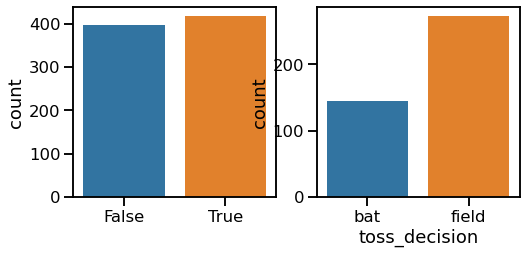

In [32]:
# Toss won vs match won
toss= match['toss_winner']==match['winner']
# who won more, 1 who choose batting or the one who choose fielding
decision= match.toss_decision[match.toss_winner==match.winner]

print('Toss fig 1')
f, ax =  plt.subplots(1,2,figsize=(8,3.5))
sns.countplot(toss,ax=ax[0])
sns.countplot(decision ,ax=ax[1])
plt.show()

Toss fig 2


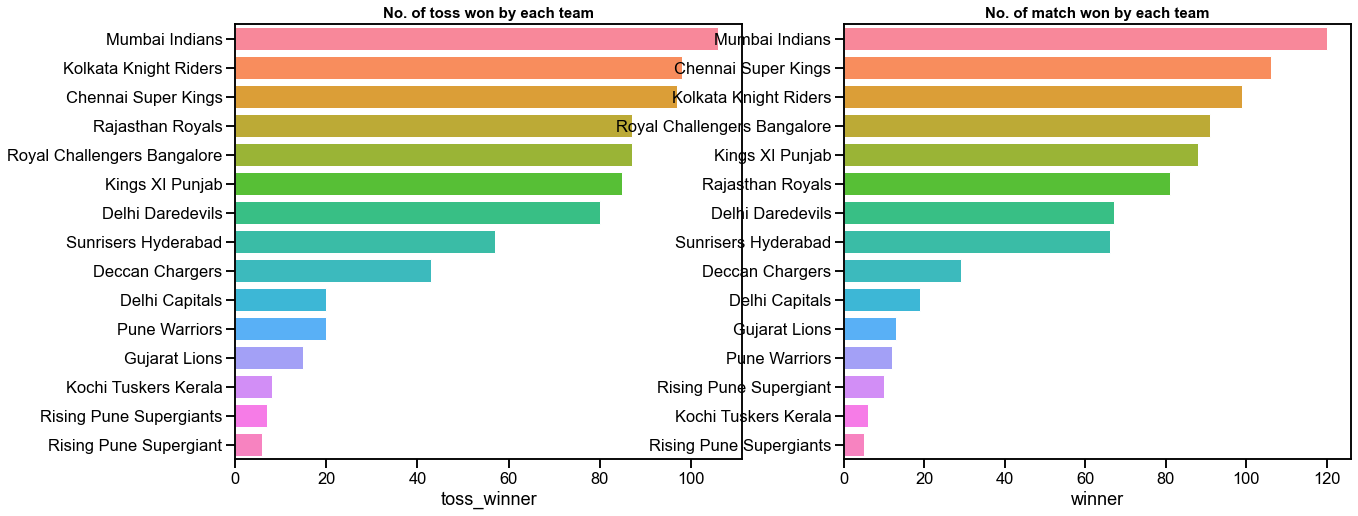

In [33]:
# Tosses won by each team &
toss= match['toss_winner'].value_counts()
# sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')

# No of match won by each team
win=match.winner.value_counts()

print('Toss fig 2')

f, ax =  plt.subplots(1,2,figsize=(20,8))

sns.set(font_scale=1.2)  # to resize x & y ticks just remember its scale not size
sns.barplot(y=toss.index, x= toss, orient = 'h', saturation=1, ax=ax[0])
ax[0].set_title('No. of toss won by each team', fontweight='bold', fontsize=15 )
sns.barplot(y=win.index, x= win, orient = 'h', saturation=1, ax=ax[1])
ax[1].set_title('No. of match won by each team', fontweight='bold', fontsize=15 )
# plt.yticks(fontsize=12)
plt.show()

Toss fig 3


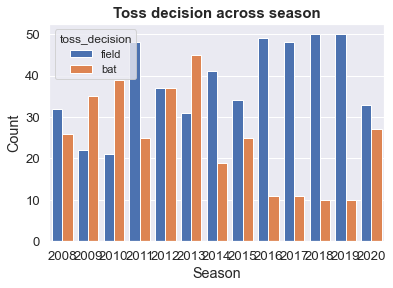

In [34]:
print('Toss fig 3')
ax= plt.axes()
sns.set(rc={'figure.figsize':(12,8)}, style='darkgrid')
ax.set_title('Toss decision across season', fontsize=15, fontweight='bold')
sns.countplot(x='Season', hue='toss_decision' ,data = match, saturation=1)
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

In [35]:
# player winning the man of the match max no of time
man_of_the_match= match.player_of_match.value_counts()
man_of_the_match.columns = ['Batsman','man of match']
#man_of_the_match.sort_values('man of match', ascending=False, inplace=True)
mom= man_of_the_match.reset_index()


# Arrange batsman as per total run in IPL
runs= byb.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns =['Batsman','Total run']
runs.sort_values('Total run', ascending=False, inplace=True)
runs.reset_index(inplace=True)
runs.drop('index',axis=1, inplace=True)
print(runs.head(10))
print()
print("Man of the Match")
print()
print(mom.head(10))


'''f, ax = plt.subplot(2,1,figsize=(5,5))

sns.barplot(data=runs.head(10), y='Batsman', x='Total run', ax=ax[0])
sns.barplot(data=mom.head(10), y='index' , x='player_of_match', ax=ax[1])
'''

          Batsman  Total run
0         V Kohli       5878
1        SK Raina       5368
2       DA Warner       5254
3       RG Sharma       5230
4        S Dhawan       5197
5  AB de Villiers       4849
6        CH Gayle       4772
7        MS Dhoni       4632
8      RV Uthappa       4607
9       G Gambhir       4217

Man of the Match

            index  player_of_match
0  AB de Villiers               23
1        CH Gayle               22
2       RG Sharma               18
3        MS Dhoni               17
4       DA Warner               17
5       YK Pathan               16
6       SR Watson               16
7        SK Raina               14
8         V Kohli               13
9       G Gambhir               13


"f, ax = plt.subplot(2,1,figsize=(5,5))\n\nsns.barplot(data=runs.head(10), y='Batsman', x='Total run', ax=ax[0])\nsns.barplot(data=mom.head(10), y='index' , x='player_of_match', ax=ax[1])\n"

In [36]:
# Store top 10 players as per total run they score in list
players_name = runs['Batsman'].head(10).to_list()
# players_name

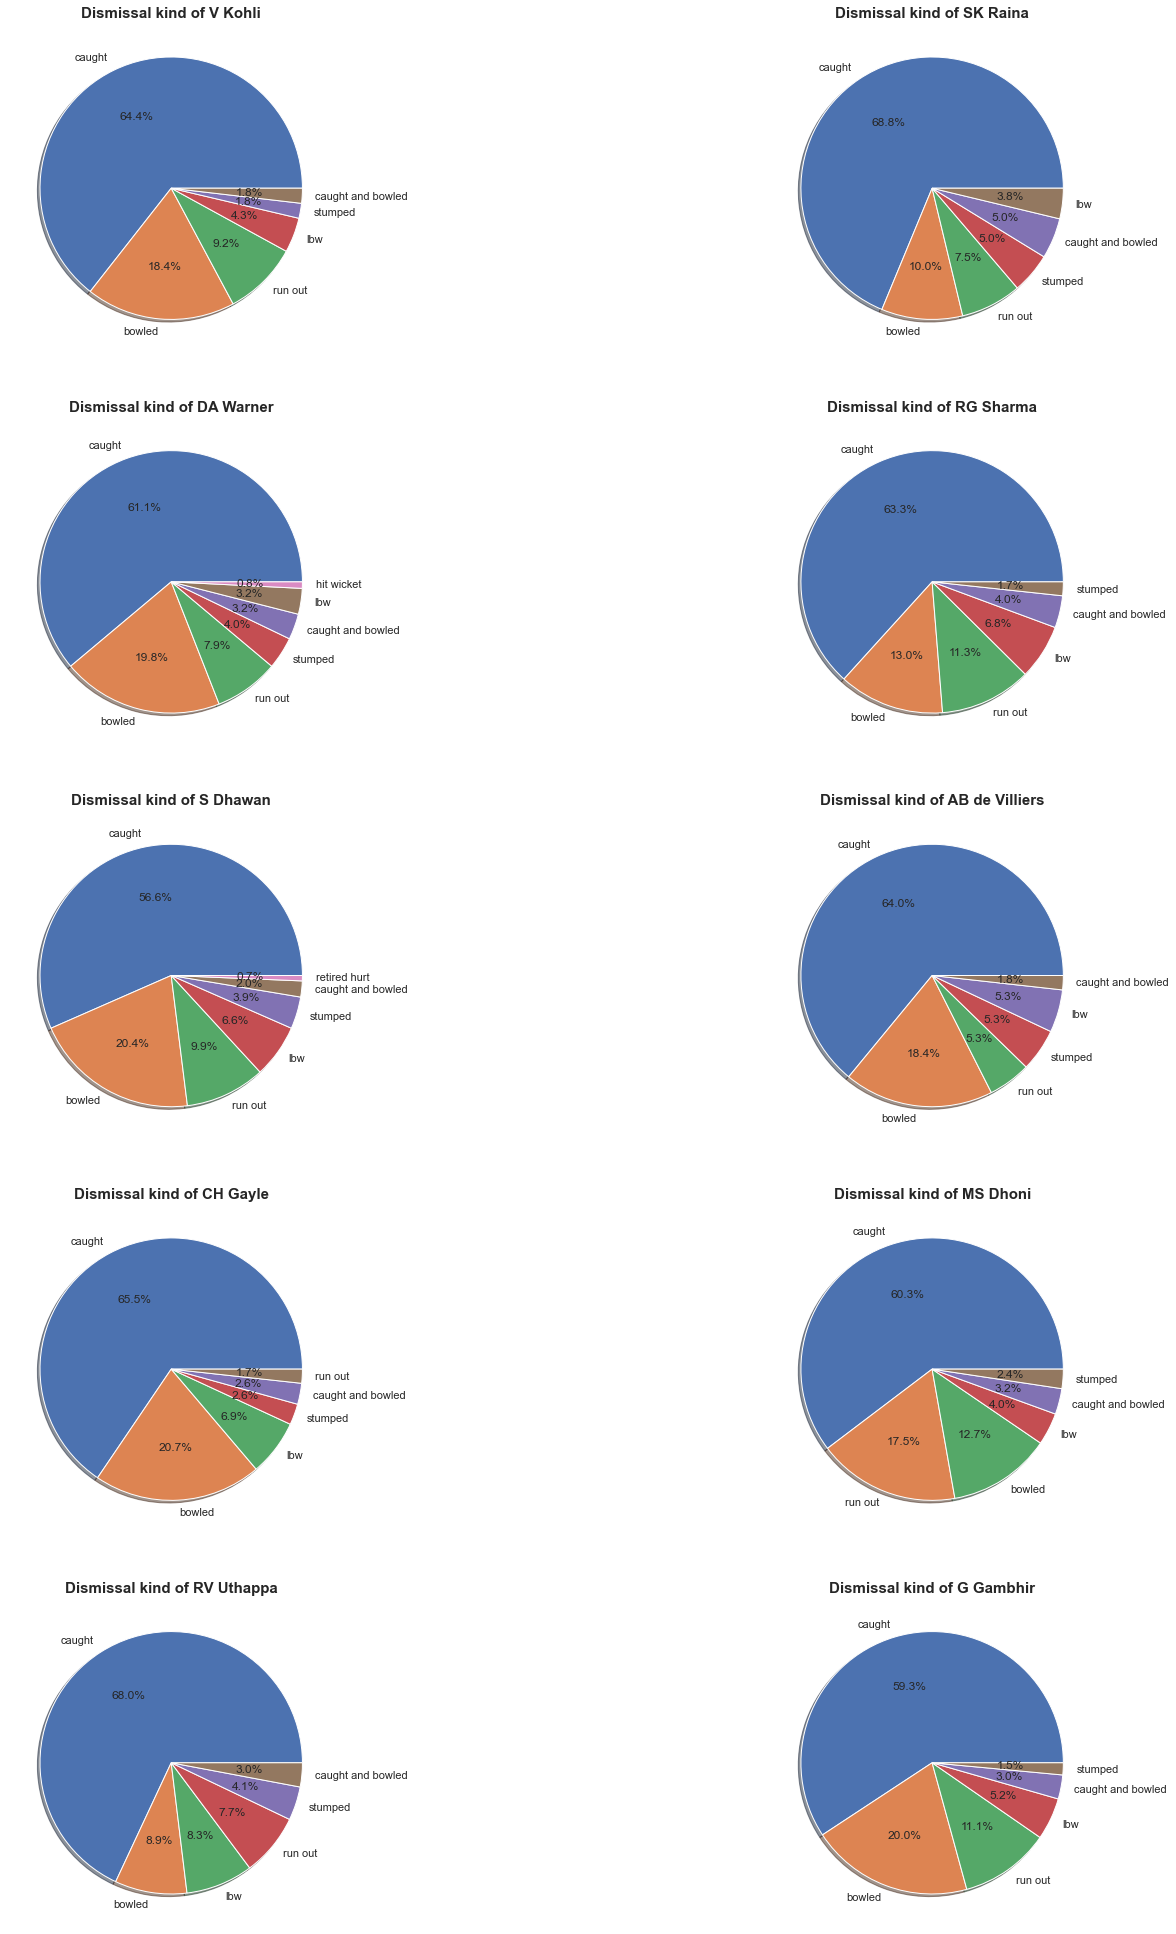

In [37]:
# Dismissal of top 10 batsman

f, ax = plt.subplots(5,2,figsize=(25,35))
'''f.set_figheight(15)
f.set_figwidth(15)'''
ax = ax.flatten()

j=0
for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    current_player['dismissal_kind'].value_counts().plot.pie( ax=ax[j],autopct='%1.1f%%', shadow=True,rotatelabels=False)
    ax[j].set_title('Dismissal kind of '+i , fontweight= 'bold', fontsize=15)
    ax[j].set_ylabel('')
    ax[j].set_xlabel('')
    j=j+1 

In [38]:
# count single, double, triple, boundry and sixes for each player from top 10

for i in players_name:
    player = (byb['batsman']==i)
    current_player = byb[player]
    def count (current_player,runs):
        return len(current_player[current_player['batsman_runs']==runs])*runs
    print('Score distribution of '+ i)
    print('Runs scored from 1s :', count(current_player,1), '     And no of 1s = ',count(current_player,1)/1)
    print('Runs scored from 2s :', count(current_player,2), '      And no of 2s = ',count(current_player,2)/2)
    print('Runs scored from 3s :', count(current_player,3), '       And no of 3s = ',count(current_player,3)/3)
    print('Runs scored from 4s :', count(current_player,4), '     And no of 4s = ',count(current_player,4)/4)
    print('Runs scored from 6s :', count(current_player,6), '     And no of 6s = ',count(current_player,6)/6)
    print()

Score distribution of V Kohli
Runs scored from 1s : 1919      And no of 1s =  1919.0
Runs scored from 2s : 692       And no of 2s =  346.0
Runs scored from 3s : 39        And no of 3s =  13.0
Runs scored from 4s : 2016      And no of 4s =  504.0
Runs scored from 6s : 1212      And no of 6s =  202.0

Score distribution of SK Raina
Runs scored from 1s : 1666      And no of 1s =  1666.0
Runs scored from 2s : 528       And no of 2s =  264.0
Runs scored from 3s : 33        And no of 3s =  11.0
Runs scored from 4s : 1972      And no of 4s =  493.0
Runs scored from 6s : 1164      And no of 6s =  194.0

Score distribution of DA Warner
Runs scored from 1s : 1348      And no of 1s =  1348.0
Runs scored from 2s : 634       And no of 2s =  317.0
Runs scored from 3s : 57        And no of 3s =  19.0
Runs scored from 4s : 2040      And no of 4s =  510.0
Runs scored from 6s : 1170      And no of 6s =  195.0

Score distribution of RG Sharma
Runs scored from 1s : 1663      And no of 1s =  1663.0
Runs sc

In [39]:
# Race chart graph for best batsman
rcg=byb[['batsman','batsman_runs']]
rcg

,batsman,batsman_runs
0,RT Ponting,1
1,BB McCullum,1
2,BB McCullum,0
3,BB McCullum,1
4,RT Ponting,1
...,...,...
193463,RR Pant,0
193464,RR Pant,1
193465,RR Pant,0
193466,RR Pant,1


In [40]:
# Race Bar Chart for Best team to win most IPL Match
match_race= match[['date','winner']]
match_race

,date,winner
0,2008-04-18,Kolkata Knight Riders
1,2008-04-19,Chennai Super Kings
2,2008-04-19,Delhi Daredevils
3,2008-04-20,Royal Challengers Bangalore
4,2008-04-20,Kolkata Knight Riders
...,...,...
811,2020-09-28,Royal Challengers Bangalore
812,2020-11-05,Mumbai Indians
813,2020-11-06,Sunrisers Hyderabad
814,2020-11-08,Delhi Capitals


ML

In [41]:
##load the data set
match_df = pd.read_csv("data/matches.csv")
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [42]:
dlvr_df = pd.read_csv("data/deliveries.csv")
dlvr_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [43]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [44]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Exploratory Data Analysis (EDA)

In [45]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [46]:
##checking for misssing values
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [47]:
##replacing null results
match_df['winner'].fillna('Draw', inplace=True)

In [48]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [49]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala': 12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {
    'team1': team_encodings,
    'team2': team_encodings,
    'winner': team_encodings,
    'toss_winner': team_encodings
}



match_df.replace(team_encode_dict, inplace = True)
match_df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,8,10,10,field,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,2,1,1,field,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,3,9,3,bat,normal,0,9,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,7,11,11,field,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,10,1,1,field,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [50]:
## missing values in city col
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cape Town           7
Abu Dhabi           7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [51]:
match_df[match_df['city'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [52]:
match_df['city'].fillna('Dubai', inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [53]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


## Toss wins and match wins by each team

In [54]:
toss_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx - 1]} -> {toss_wins[idx]}")

Mumbai Indians -> 98
Kolkata Knight Riders -> 92
Chennai Super Kings -> 89
Kings XI Punjab -> 81
Royal Challengers Bangalore -> 81
Delhi Daredevils -> 80
Rajasthan Royals -> 80
Sunrisers Hyderabad -> 46
Deccan Chargers -> 43
Kochi Tuskers Kerala -> 20
Gujarat Lions -> 15
Rising Pune Supergiants -> 13
Pune Warriors -> 10
Rising Pune Supergiant -> 8


<AxesSubplot:>

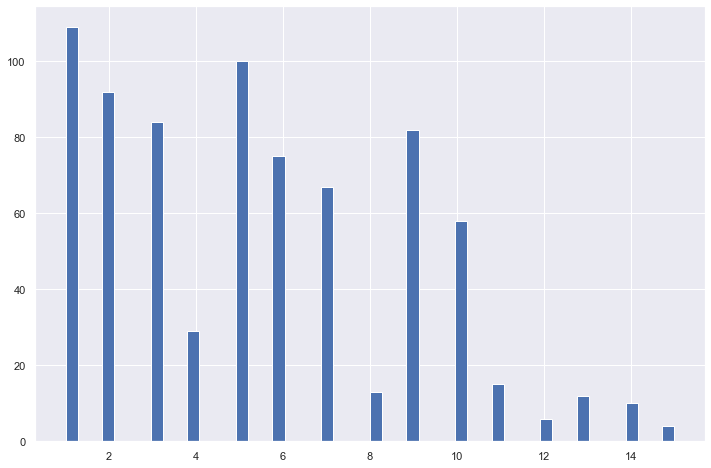

In [55]:
match_df['winner'].hist(bins=50)

Text(0.5, 1.0, 'match winners')

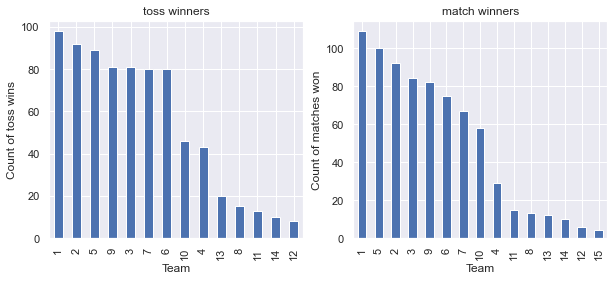

In [56]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title('toss winners')
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title('match winners')

In [57]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Dropping the redundant columns

In [58]:
match_df = match_df[['team1', 'team2', 'city', 'toss_decision', 'toss_winner', 'venue', 'winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,14,Visakhapatnam,field,14,ACA-VDCA Stadium,14
754,14,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


In [59]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision', 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,14,32,1,14,0,14
754,14,5,32,1,5,0,5


## Machine Learning

In [60]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions, data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target],
                            scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')

In [62]:
##logestic regression
target_var = ["winner"]
predictor_var = ['team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()

print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.32
Cross-Validation Scores: [3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE: 3.555224332732571


In [63]:
##random forest classifier
model = RandomForestClassifier(n_estimators=100)
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0.89
Cross-Validation Scores: [3.7228355  3.86550757 3.46529428 3.62498219 3.79143772]
Average RMSE: 3.694011451490078


In [64]:
team1 = 'Mumbai Indians'
team2 = 'Sunrisers Hyderabad'
toss_winner = 'Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1], team_encode_dict['team2'][team2], '14', team_encode_dict['toss_winner'][toss_winner], '2', '1']
print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output = model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[1, 10, '14', 10, '2', '1']
[['1' '10' '14' '10' '2' '1']]
[1]
The winner would be: Mumbai Indians


In [65]:
pd.Series(index=predictor_var, data=model.feature_importances_)

team1            0.222109
team2            0.257029
venue            0.181297
toss_winner      0.156133
city             0.151126
toss_decision    0.032305
dtype: float64

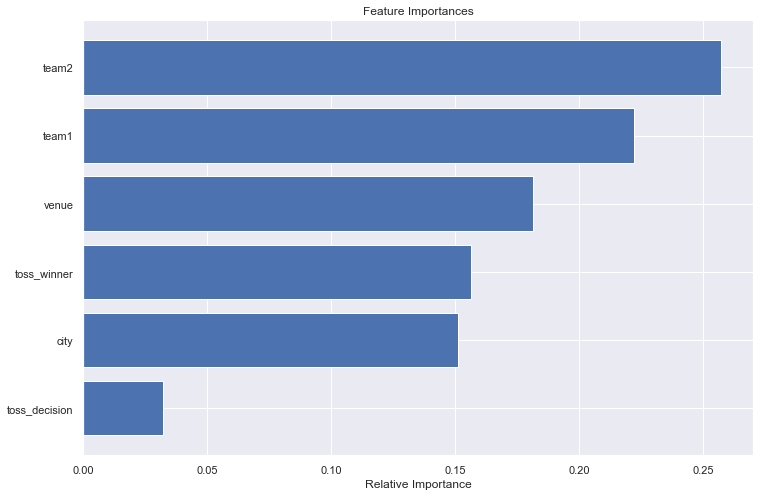

In [69]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [predictor_var[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()